In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# matplot gallery 참고
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Pclass

In [7]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [10]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap="cool")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

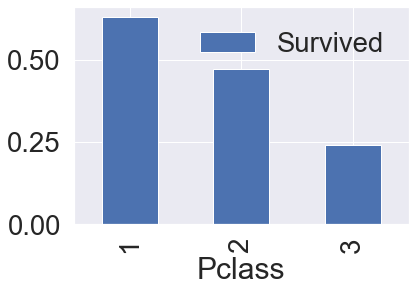

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar()

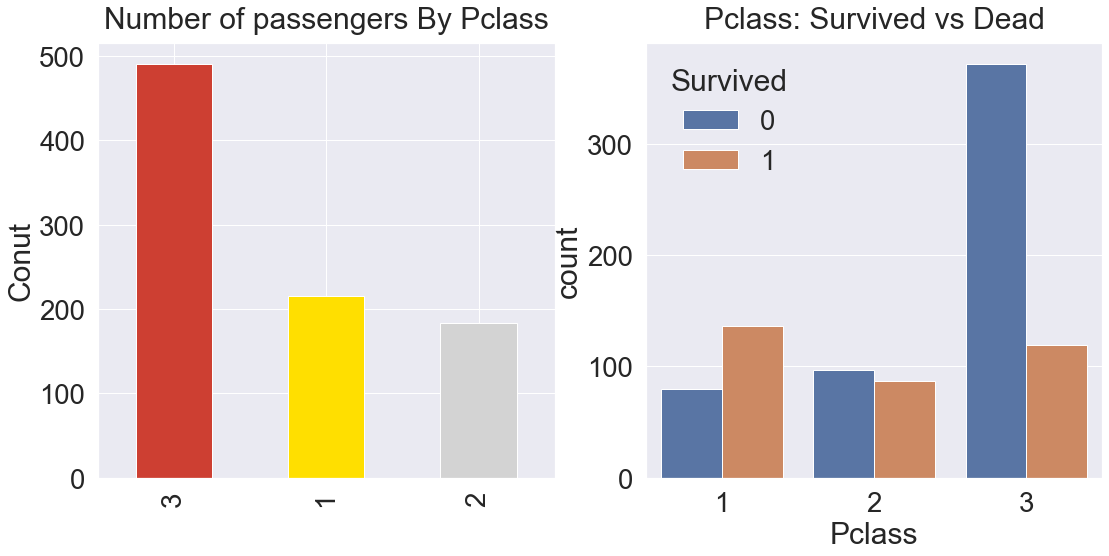

In [14]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD3F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Conut')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- sex

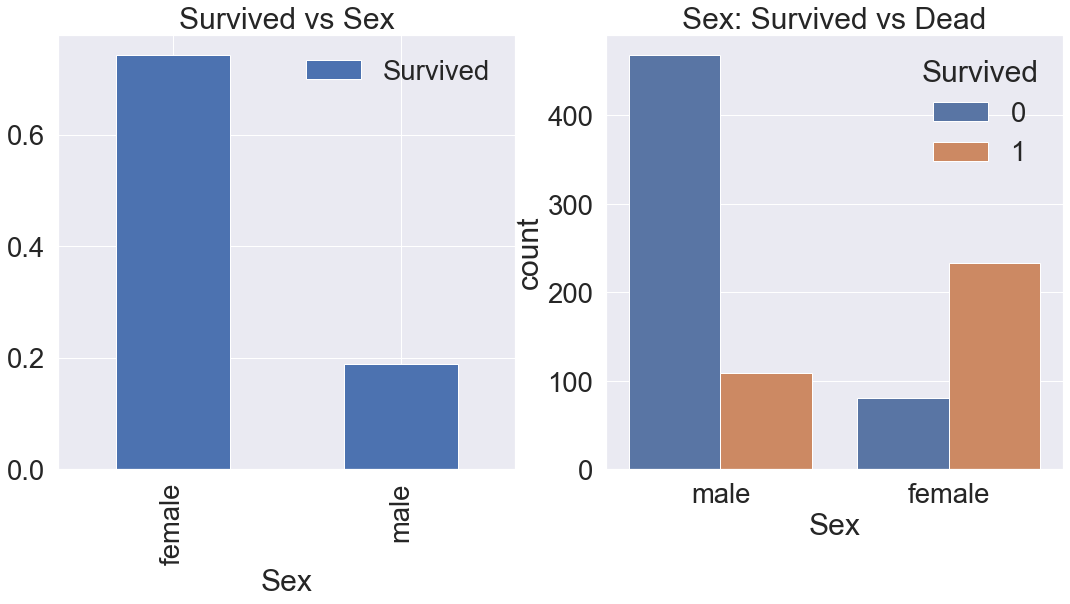

In [16]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- both Sex and Pclass

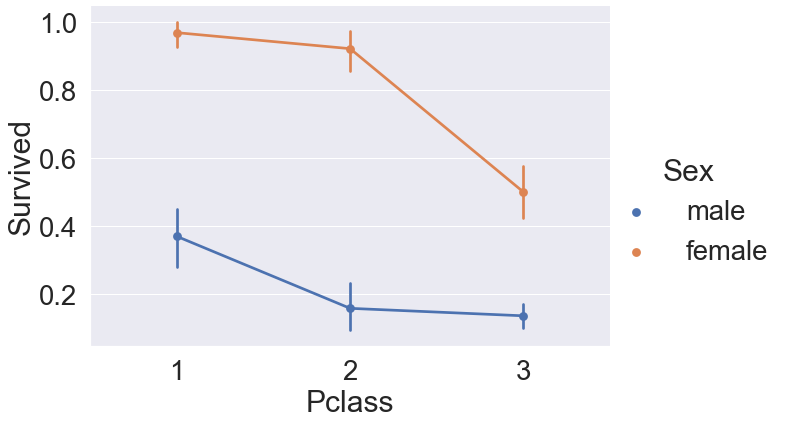

In [18]:
sns.factorplot('Pclass','Survived',hue="Sex",data=df_train, size=6, aspect=1.5)

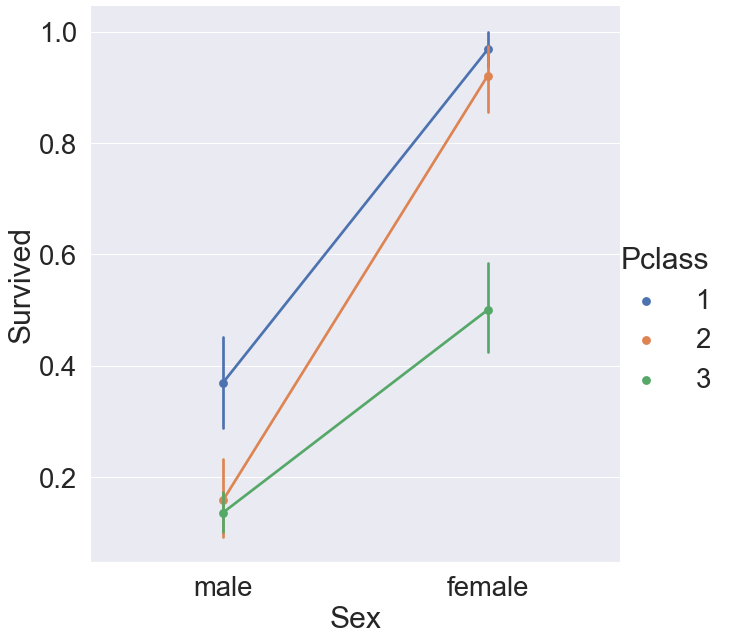

In [19]:
sns.factorplot(x='Sex', y="Survived",hue="Pclass", data=df_train, saturation=.5,size=9,aspect=1)

- age

In [22]:
print("제일 나이 많은 탑승객 : {:.1f} years".format(df_train['Age'].max()))
print("제일 나이 어린 탑승객 : {:.1f} years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} years".format(df_train['Age'].mean()))



제일 나이 많은 탑승객 : 80.0 years
제일 나이 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


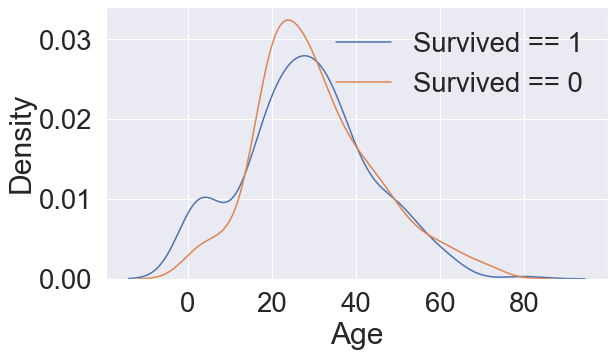

In [23]:
fig, ax = plt.subplots(1,1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

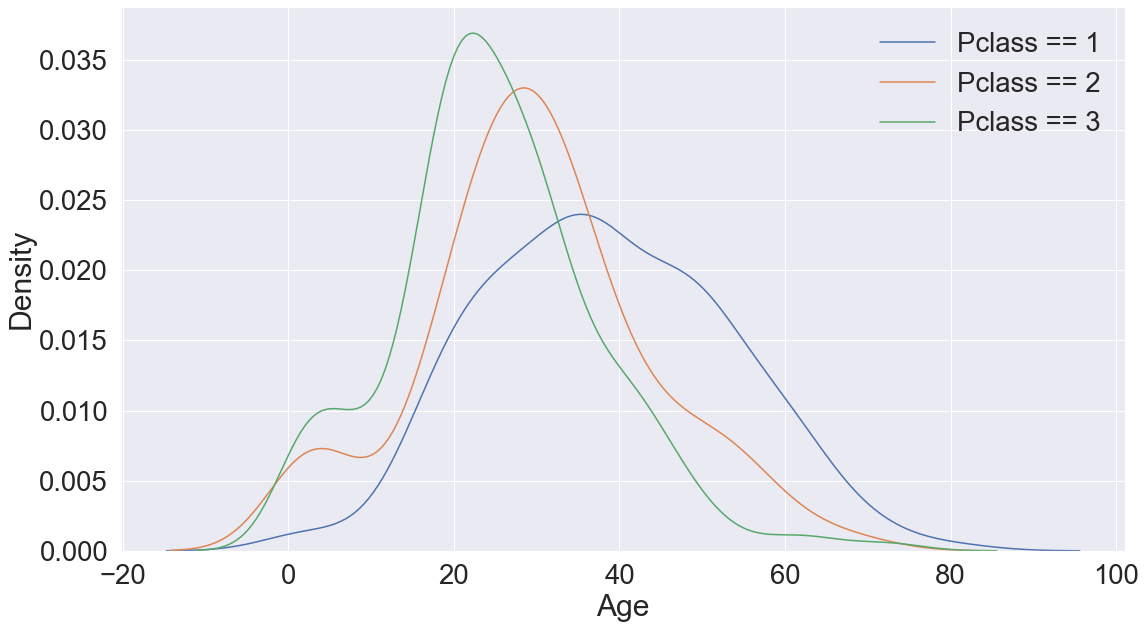

In [30]:
fig, ax = plt.subplots(1,1, figsize=(18, 10))
sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==2]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==3]['Age'], ax=ax)
plt.legend(['Pclass == 1', 'Pclass == 2', 'Pclass == 3'])
plt.show()

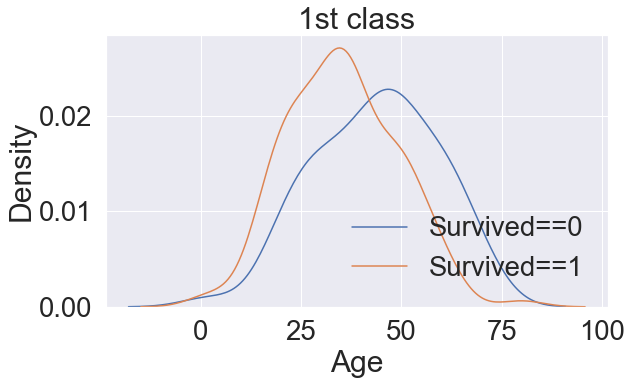

In [31]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax )
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax )
plt.legend(['Survived==0', 'Survived==1'])
plt.title('1st class')
plt.show()


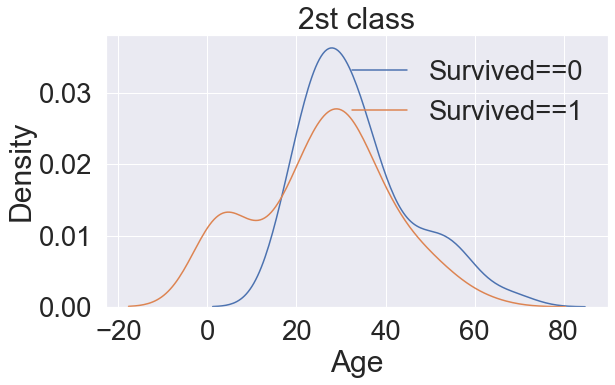

In [34]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax )
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax )
plt.legend(['Survived==0', 'Survived==1'])
plt.title('2st class')
plt.show()

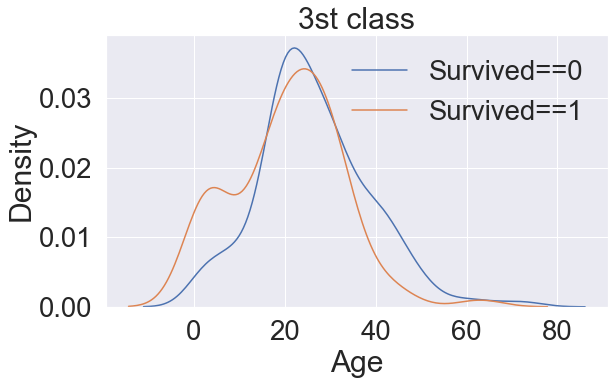

In [35]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax )
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax )
plt.legend(['Survived==0', 'Survived==1'])
plt.title('3st class')
plt.show()

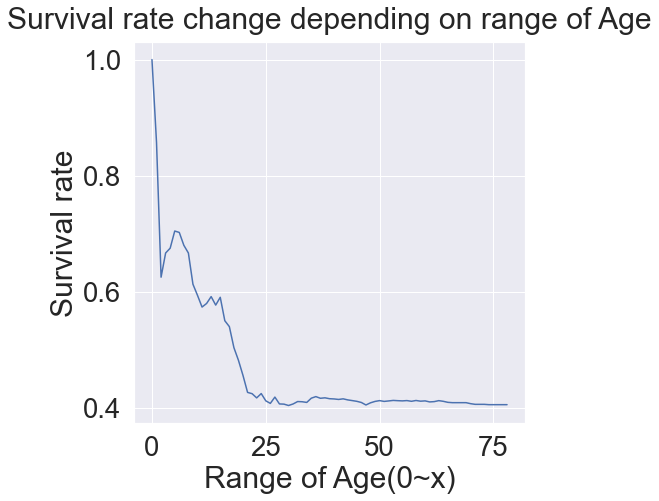

In [36]:
change_age_range_survival_ratio = []

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title("Survival rate change depending on range of Age", y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()



- Pclass, sex, age

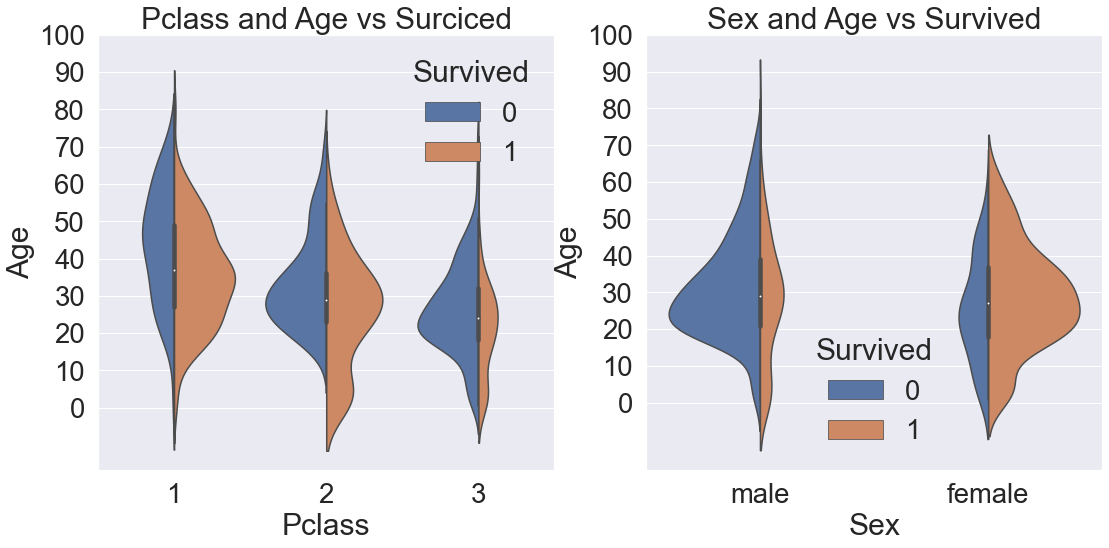

In [37]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue="Survived", data=df_train, scale="count", split=True, ax=ax[0] )
ax[0].set_title("Pclass and Age vs Surciced")
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex',"Age",hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- Embarked

<AxesSubplot:xlabel='Embarked'>

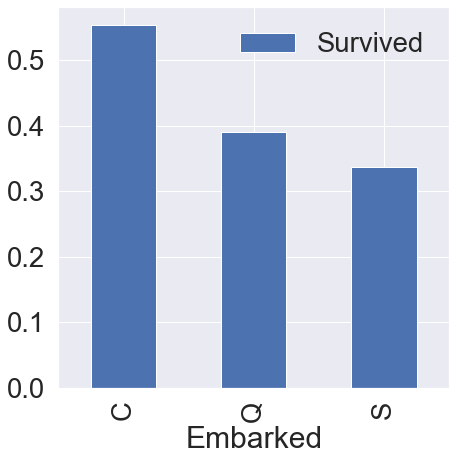

In [39]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax)

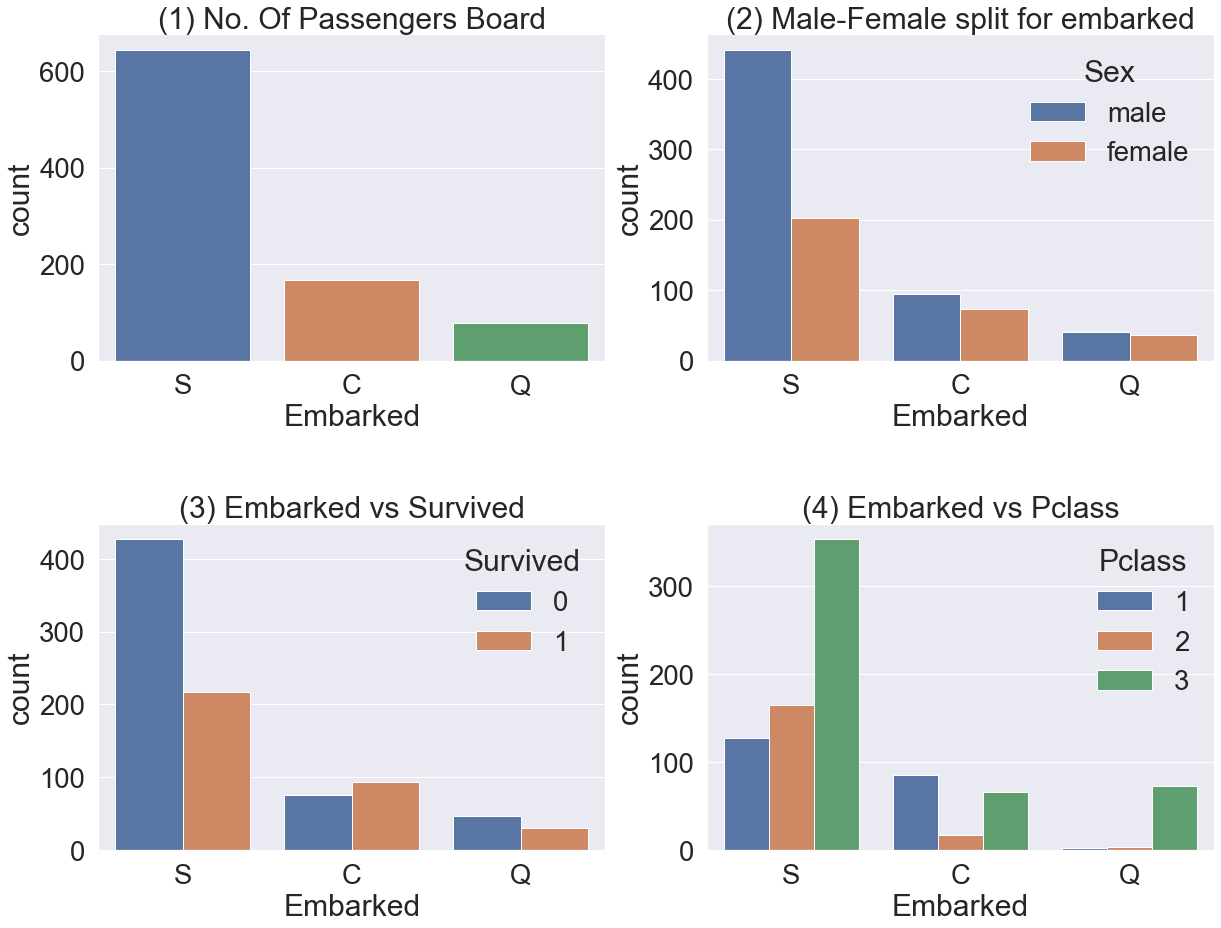

In [42]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Board')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived',data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Family - SibSp + Parch

In [43]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1



In [45]:
print(df_train['FamilySize'].max())
print(df_train['FamilySize'].min())


11
1


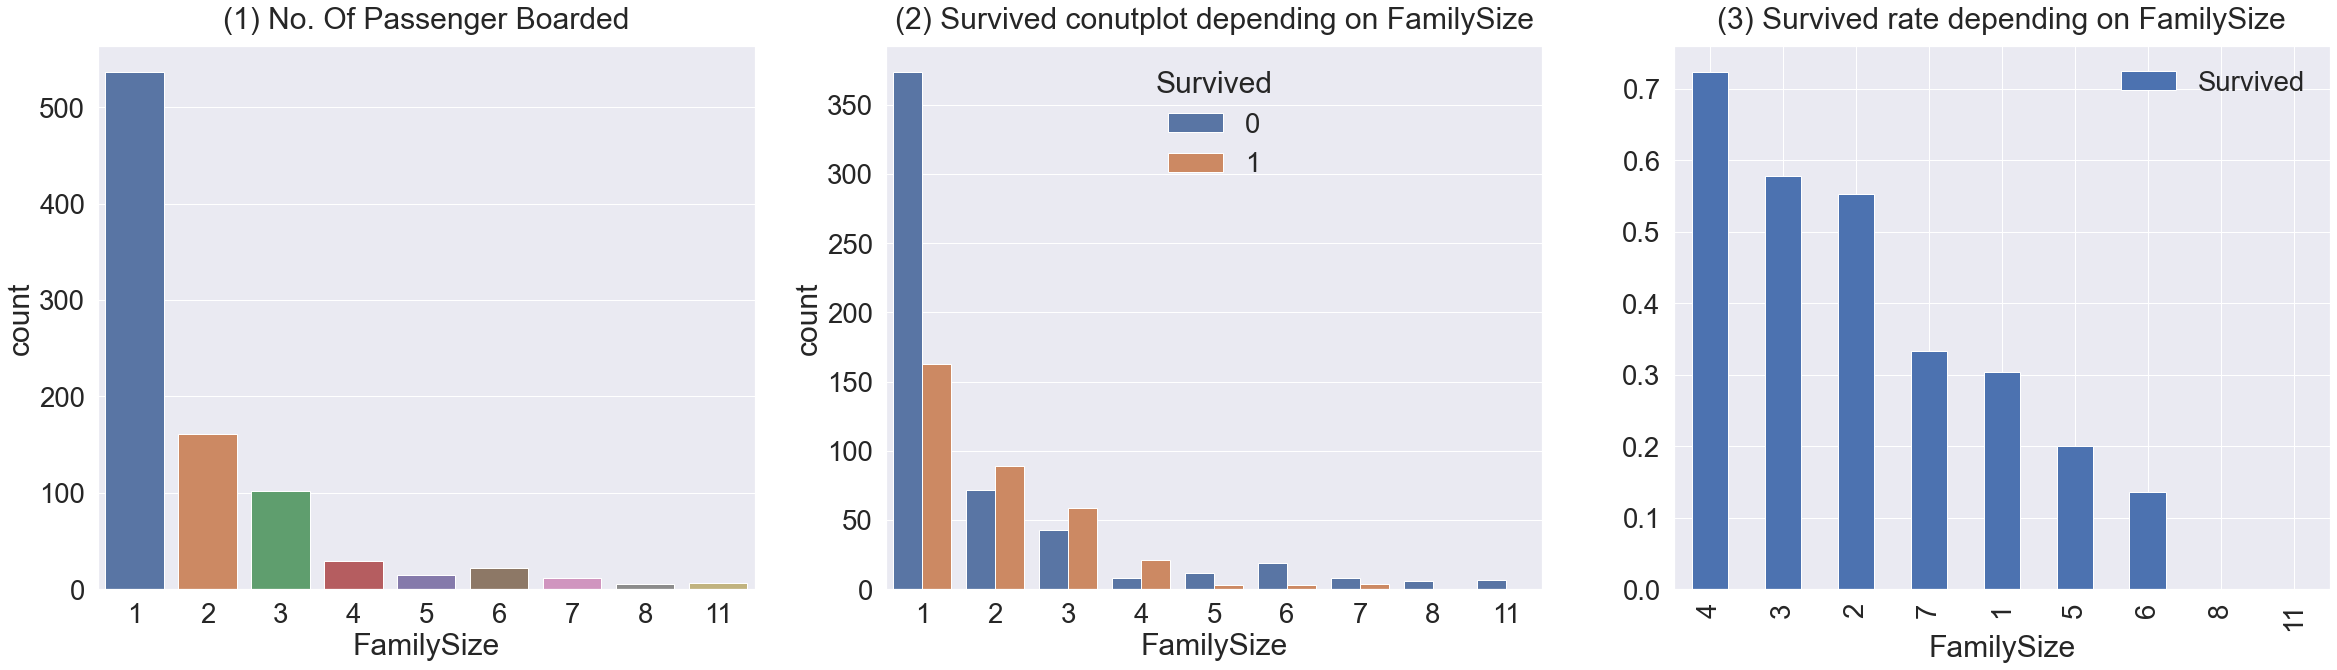

In [46]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title("(1) No. Of Passenger Boarded", y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("(2) Survived conutplot depending on FamilySize", y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("(3) Survived rate depending on FamilySize", y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
